### Python Results
### Author: Gilsiley Henrique Darú

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import time


### Time to comparative

In [98]:
start = time.time()
for i in range(1,1000000000):
    pass
end = time.time()
print(end - start)

40.034799098968506


### Load data

In [268]:
df = pd.read_excel('results.xlsx')
df = df.append(pd.read_excel('results2.xlsx'))
df = df[df['size']<400]
df['distance'] = (df['objective']-df['optimal'])/df['optimal']

### Total Execution Time

In [269]:
summary = df.groupby(by='size').agg({'type':'count', 'time':'sum','time_optimal':'sum'}).reset_index()
duration = summary.time_optimal.sum() + summary.time.sum()
days = duration // 86400
rest = (duration - days * 86400)
hours = rest // 3600
rest = rest - hours * 3600
minutes = rest // 60
rest = rest - minutes * 60
seconds = int(rest)
print("{:.0f} day,{:.0f} hours, {:.0f} minutes and {:.0f} seconds".format(days, hours, minutes , seconds))
#summary.plot(kind='scatter',x=['size','size'],y=['time','time_optimal'])

1 day,0 hours, 34 minutes and 48 seconds


### Summary Table

In [270]:
summary = df.groupby(by='size').agg({'type':'count', 'time':'sum','time_optimal':'sum'}).reset_index()
table = summary.copy()
total = table.sum().to_dict()
total['size']='Total'
table  = table.append(total, ignore_index=True)
table['%total time'] = table['time']/table.time_optimal
table['type'] = table['type'].map(lambda x: '{:.0f}'.format(x))
table['time'] = table['time'].map(lambda x: '{:.0f}'.format(x))
table['time_optimal'] = table['time_optimal'].map(lambda x: '{:.0f}'.format(x))
table['%total time'] = table['%total time'].map(lambda x: '{:.1f}%'.format(x*100))
table.columns = ['Size','# Samples','Time', 'Time for Optimal Solution','% Total Time']
print(table.to_latex(index=False))

\begin{tabular}{lllll}
\toprule
  Size & \# Samples &  Time & Time for Optimal Solution & \% Total Time \\
\midrule
    50 &       150 &    74 &                       121 &        61.7\% \\
   100 &       150 &   132 &                       578 &        22.9\% \\
   150 &       150 &   165 &                      1953 &         8.5\% \\
   200 &       150 &   179 &                      2931 &         6.1\% \\
   250 &       150 &   271 &                     11200 &         2.4\% \\
   300 &       150 &   363 &                     28581 &         1.3\% \\
   350 &       150 &   421 &                     41519 &         1.0\% \\
 Total &      1050 &  1606 &                     86883 &         1.8\% \\
\bottomrule
\end{tabular}



### General Results

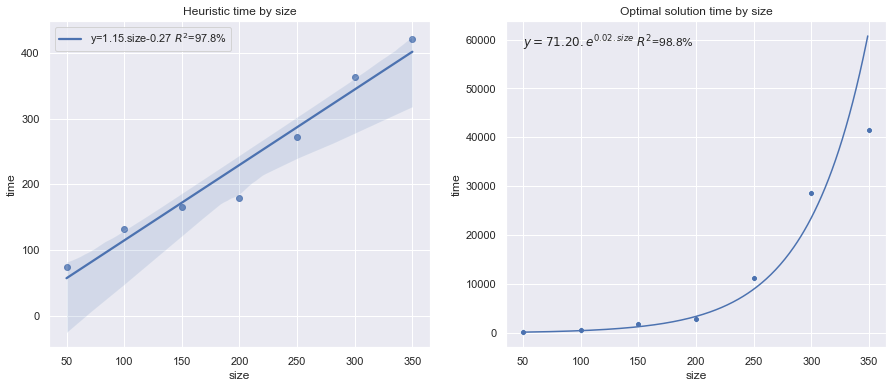

In [271]:
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
from scipy import stats
#source https://stackoverflow.com/questions/45902739/seaborn-annotate-the-linear-regression-equation

fig, ax = plt.subplots(1,2,figsize=(15,6))

# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(summary['size'],summary['time'])

# use line_kws to set line label for legend
sns.regplot(x="size", y="time", data=summary, 
 line_kws={'label':"y={0:.2f}.size{1:.2f} $R^2$={2:.1f}%".format(slope,intercept,r_value*100)}, ax=ax[0])

# plot legend
ax[0].legend()
ax[0].set_xlabel('size')
ax[0].set_ylabel('time')
ax[0].set_title('Heuristic time by size')

# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(summary['size'],np.log(summary['time_optimal']))
ax1 = sns.scatterplot(x="size", y='time_optimal', data=summary, ax=ax[1])
x = np.arange(50,350,1)
y = np.exp(slope*x)*np.exp(intercept)
sns.lineplot(x=x,y=y, ax=ax[1])

# plot legend
#ax1.legend()
ax1.set_xlabel('size')
ax1.set_ylabel('time')
ax1.set_title('Optimal solution time by size')
equation = "$y={0:.2f}.e^{{{1:.2f}.size}}$ $R^2$={2:.1f}%".format(np.exp(intercept),slope,r_value*100)
ax1.annotate(equation,
            xy=(50, y[-3]))
#t = ax.text(0, 0, "Direction", ha="center", va="center", rotation=45,
#            size=15)
plt.savefig('heuristictime.png')

plt.show()


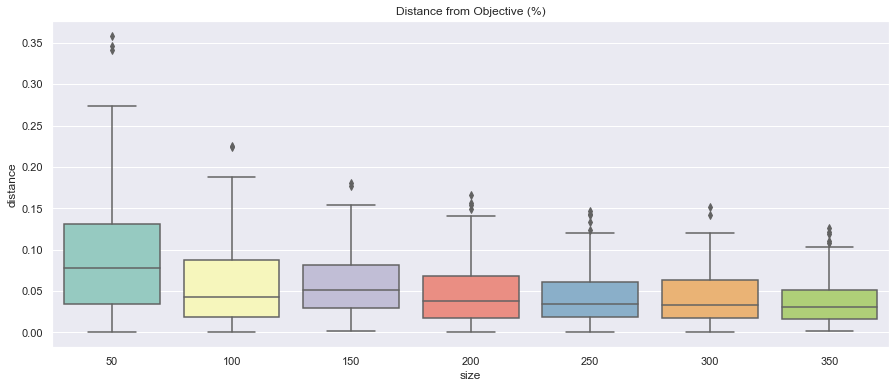

In [289]:
figure, ax = plt.subplots(1,1,figsize=(15,6))
#ax[0] = sns.boxplot(x="size", y="time",
#                 data=df,palette="Set3", ax=ax[0])#, **{'showfliers':False}
#ax[0].set_title("Heuristic Time")
ax = sns.boxplot(x="size", y="distance",
                 data=df,palette="Set3",  ax = ax)
ax.set_title("Distance from Objective (%)")
plt.savefig('performance.png')

In [290]:
df.groupby(by='size').agg({'distance':'median'})

,distance
size,
50,0.077470
100,0.042397
150,0.051405
200,0.038166
250,0.034762
300,0.033206
350,0.030856


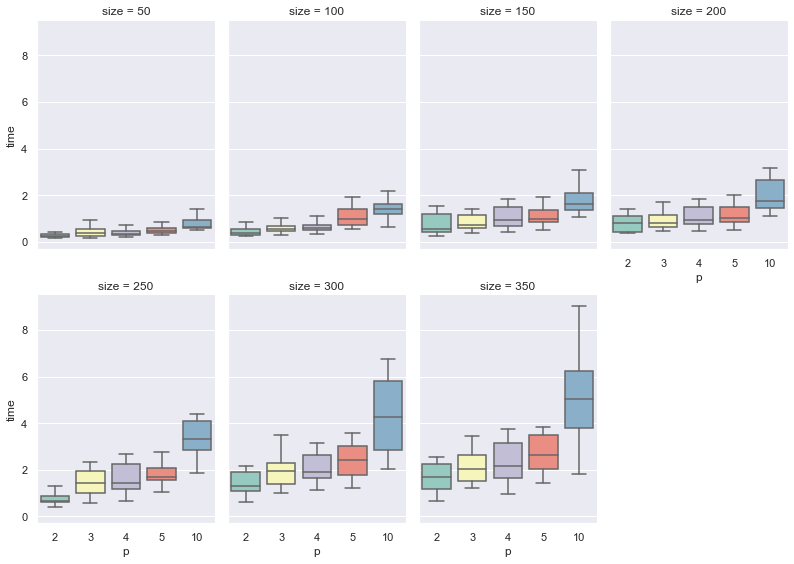

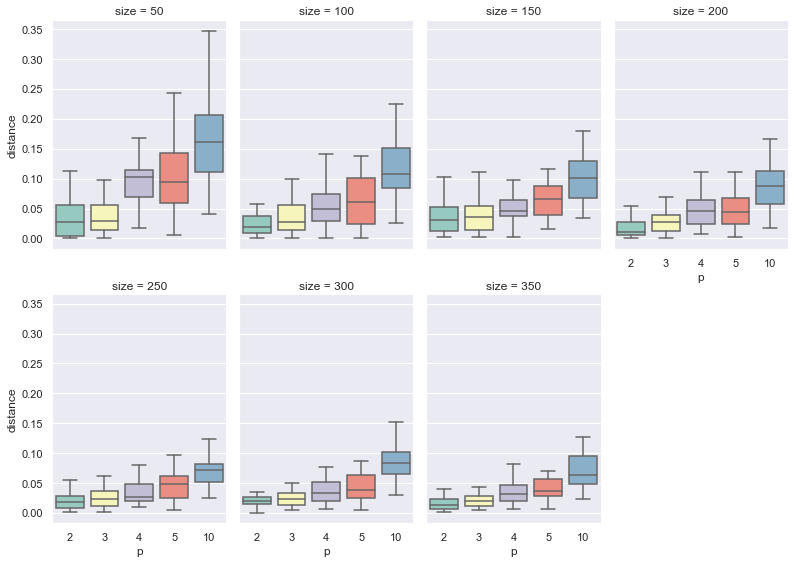

In [295]:
#ax = sns.boxplot(x="size", y="time_optimal", hue="p",
#                 data=df,palette="Set3")

#g = sns.catplot(x="p", y="time",
#                col="size",
#                data=df, kind="box",
#                height=4, palette="Set3",aspect=.7, sharey=False,**{"showfliers":False});
#g = sns.catplot(x="p", y="time_optimal",
#               col="size",
#                data=df, kind="box",
#                height=4, palette="Set3",aspect=.7, sharey=False, 
#                **{"showfliers":False});
g = sns.catplot(x="p", y="time",
               col="size",
                data=df, kind="box",col_wrap=4,
                height=4, palette="Set3",aspect=.7, **{"showfliers":False});
plt.savefig('timep.png')
g = sns.catplot(x="p", y="distance",
               col="size",
                data=df, kind="box",col_wrap=4,
                height=4, palette="Set3",aspect=.7, **{"showfliers":False})
plt.savefig('distancep.png')

